In [111]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
from keras import regularizers
import pickle

## Load Data

In [112]:
labels_to_names = {
        0: 'T-shirt/top',
        1: 'Trouser',
        2: 'Pullover',
        3: 'Dress',
        4: 'Coat',
        5: 'Sandal',
        6: 'Shirt',
        7: 'Sneaker',
        8: 'Bag',
        9: 'Ankle boot',
    }

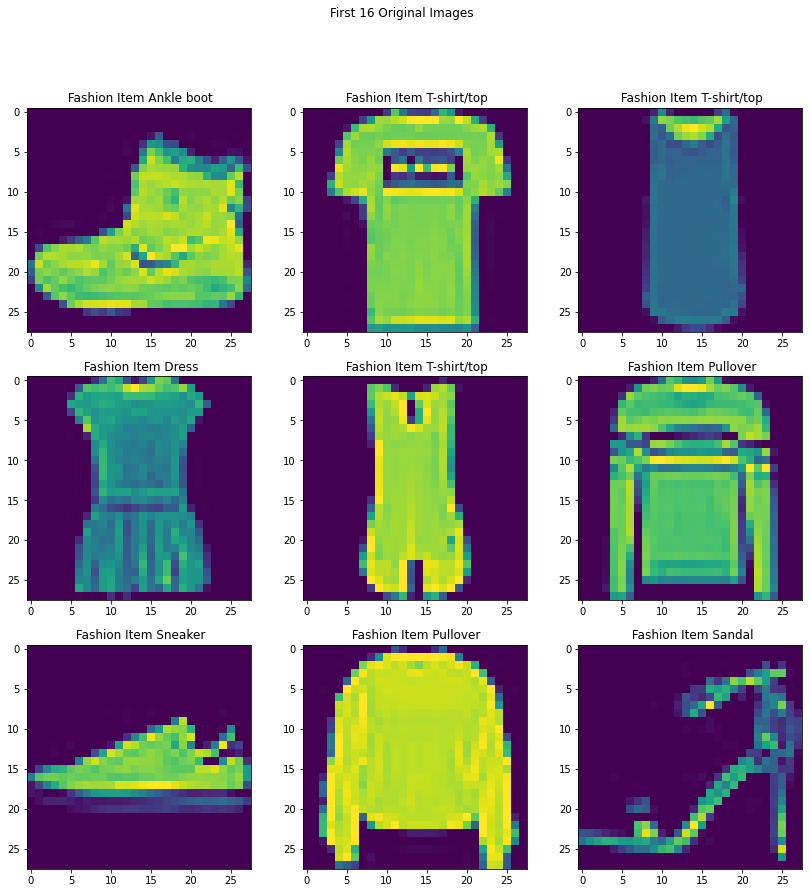

In [113]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))
x=x[:9]
y=y[:9]

n=0
fig, axis = plt.subplots(3, 3, figsize=(14, 14))
for i, ax in enumerate(axis.flat):
    # n=random.randint(0,40000)
    ax.imshow(x_train[n])
    
    ax.set(title= " Fashion Item " + str(labels_to_names[y_train[n]]) )
    n=n+1
plt.suptitle('First 16 Original Images')
x = x.reshape(x.shape[0], img_rows, img_cols, 1)



In [114]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

datagen.fit(x)
d1 = datagen.flow(x, y,batch_size=9)
x1,y1=d1.next()

Text(0.5, 0.98, 'First 16 Modified Images')

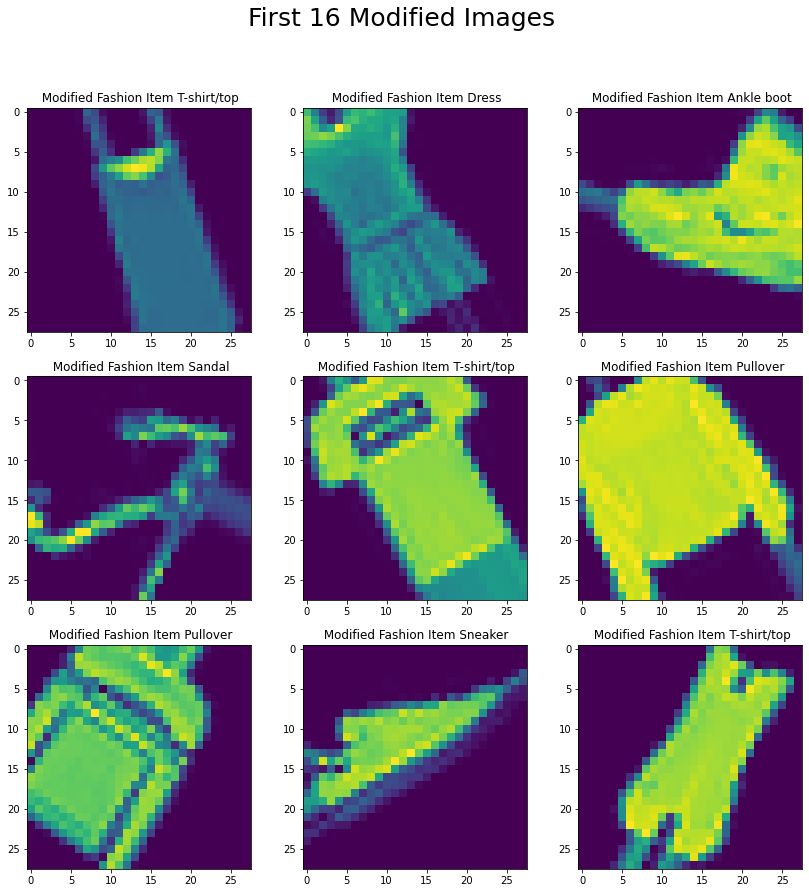

In [115]:
x1 = x1.reshape(x1.shape[0], img_rows, img_cols)
fig, axis = plt.subplots(3, 3, figsize=(14, 14))
n=0
for i, ax in enumerate(axis.flat):
    ax.imshow(x1[n])
    ax.set(title= " Modified Fashion Item " + str(labels_to_names[y1[n]]) )
    n=n+1
plt.suptitle("First 16 Modified Images",fontsize=25)

In [116]:
x=x.reshape(x.shape[0], img_rows,img_cols)
x_full=np.concatenate((x, x1))
y_full=np.concatenate((y, y1))


#### Plot taking 16 images from the original set and displaying both the original and modified images. First 9 are from the original set and second 9 are the modified images generated by ImageDataGenerator

Text(0.5, 0.98, 'Original and Modified Image set of first 16 Images')

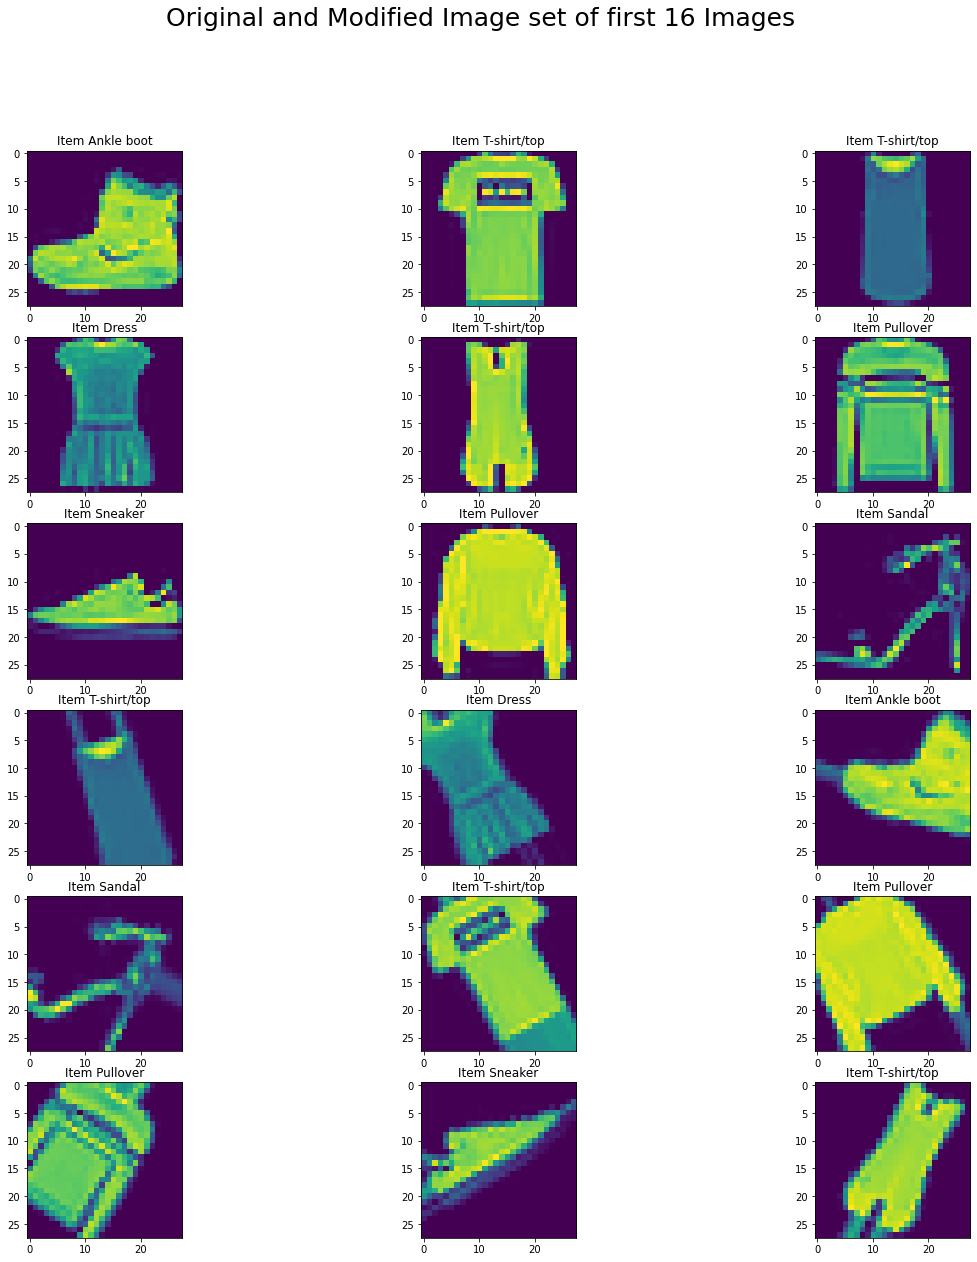

In [117]:
fig, axis = plt.subplots(6,3 , figsize=(20, 20))
n=0
for i, ax in enumerate(axis.flat):
    ax.imshow(x_full[n])
    ax.set(title= "Item "+ str(labels_to_names[y_full[n]])) 
    n=n+1
plt.suptitle("Original and Modified Image set of first 16 Images",fontsize=25)

